<a href="https://colab.research.google.com/github/HaripriyaVennam/Neural-Networks-and-Deep-Learning/blob/main/Week8/ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# First hidden layer (encoding layer)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Additional hidden layer
encoded_hidden = Dense(128, activation='relu')(encoded)  # new hidden layer with 128 units

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded_hidden)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.6946 - val_loss: 0.6945


In [15]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# First hidden layer (encoding layer)
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Additional hidden layer
encoded_hidden = Dense(128, activation='relu')(encoded)  # new hidden layer with 128 units

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded_hidden)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.6949 - val_loss: 0.6947
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.6947 - val_loss: 0.6944
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6944 - val_loss: 0.6942
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6942 - val_loss: 0.6939
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6939 - val_loss: 0.6937
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6937 - val_loss: 0.6935
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6935 - val_loss: 0.6933
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.6933 - val_loss: 0.6931
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6931 - val_loss: 0.6928
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.6929 - val_loss: 0.6926


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


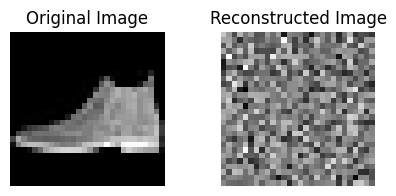

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the reconstructed images on the test data
reconstructed_images = autoencoder.predict(x_test)

# Select an image index from the test data
index = 0  # You can choose any index to visualize

# Reshape the selected test image and the reconstructed image back to their 28x28 shape (original shape)
original_image = x_test[index].reshape(28, 28)
reconstructed_image = reconstructed_images[index].reshape(28, 28)

# Visualize the original image
plt.figure(figsize=(5, 2))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

# Visualize the reconstructed image
plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')

# Show the plots
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


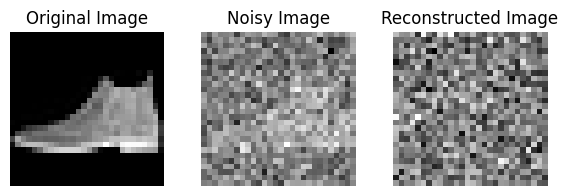

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Predict the reconstructed images on the noisy test data
reconstructed_images = autoencoder.predict(x_test_noisy)

# Select an image index from the noisy test data
index = 0  # You can choose any index to visualize

# Reshape the selected noisy image (original) and the reconstructed image back to their 28x28 shape
original_image = x_test[index].reshape(28, 28)
noisy_image = x_test_noisy[index].reshape(28, 28)
reconstructed_image = reconstructed_images[index].reshape(28, 28)

# Visualize the noisy image (input to the autoencoder)
plt.figure(figsize=(7, 2))
plt.subplot(1, 3, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

# Visualize the original image (ground truth)
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

# Visualize the reconstructed image (output from the denoising autoencoder)
plt.subplot(1, 3, 3)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')

# Show the plots
plt.show()

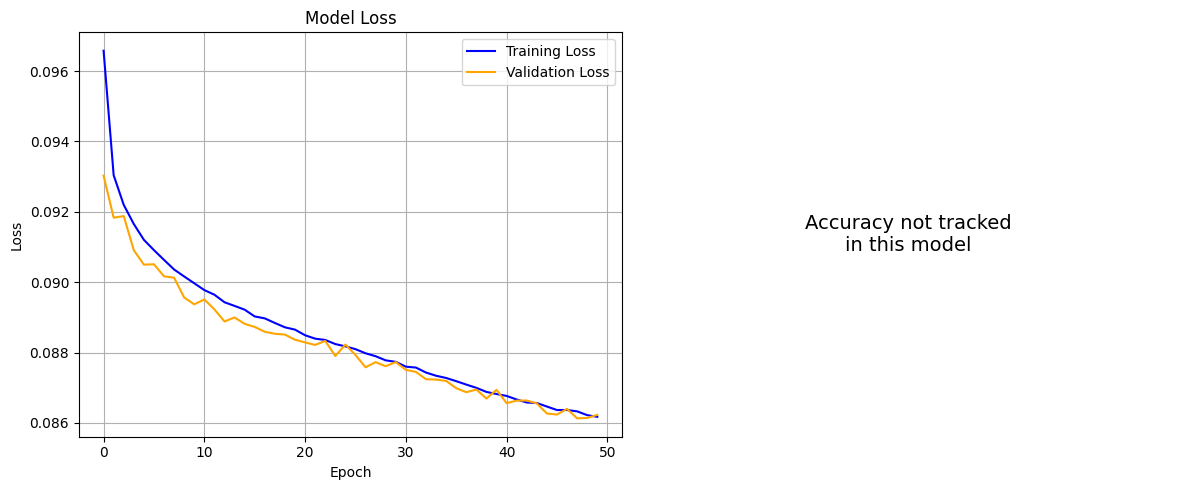

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy if available
if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
else:
    # Just display a message if accuracy isn't tracked
    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.text(0.5, 0.5, 'Accuracy not tracked\nin this model', horizontalalignment='center',
             verticalalignment='center', fontsize=14)

plt.tight_layout()
plt.show()


https://drive.google.com/file/d/1nPBv1x76lwi0x7FycixGyN-L3nhGWicv/view?usp=drive_link